## Genomic Data Clustering 

<h2> Background </h2>

<p> The discover of DN, and the critical role it plays in information storage for all biological beings, was a seminal moment for the biological sciences. All the information that is needed for the functioning of a living cell is encodec in and ultimately derived from the DNA of that cell, and this holds true for all biological organism on the planet </p>
<p> <b> DNA can be represented as a text sequence, with an alphabet that only has four letters - A - C - G and T. </b> The diversity of living organism and their complex properties is hidden in their genomic sequences. One of the most exiting problems in modern science is to understand the organization of living matter by reading genomic sequences. </p>
<p> One distinctive message in a genomic sequence is a piece of text, called a gene. Genes can be oriented in the sequence in either the forward or backward directions. In the highest organism the notion of a gene is more complex </p>
<p> It was one of the many great discoveries of the th century, that biological information is encoded in genes by means of trples of letters. called codons in the biological leterature. </p>
<p> In this exercise, we will see that it is possible to verify the validity of the discovery of three-letter codons, simply by performing unsupervised learning on the genetic sequence </p>

<h2> Problem Statement </h2>

<p> The work starts with a fragment of the genomic sequence of the bacterium Caulobacter Crescentus. This sequence is given as a long text file (300 kb), and the task is to look at the file and ensure that the text uses the alphabet of four letters (A, C, G, and T) and that these letters are used without spaces. It is noticeable that, although the text seems to be random, it is well organized, but we cannot understand it without special tools. Statistical methods may help us do so. </p>
<p> In this case study, we accept data from a genome and have the goal of identifying useful genes versus noise. Unfortunately, we don't know which sequences of genes are useful, so we have to use Unsupervised Learning to infer this. </p>
<p> In the notebook we walk through the following series of steps:
    <ol>
        <li> First, the data is imported adn prepared. Initially, the sequence, a single string, is split into non-overlapping substrings of length , and we may then count the combinations of the distinct 1,2,3 and 4-length sequences of base pairs that appear in each possible substring. </li>
        <li> PCA is performed to try to identify the internal structure of the data </li>
        <li> Finally if PCA reveals some internal structure the we'ill apply clustering techniques to the dataset. </li>
</ol>
</p>
<p><mark> We will see that it is possible to verify the validity of the discovery of three-letter codons, simply by performing unsupervised machine learning on the genetic sequences </mark></p>

<h2> Importing libraries </h2>

In [25]:
import pandas as pd

import numpy as np 

from tqdm import tqdm

from sklearn.decomposition import PCA

from sklearn import manifold

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings("ignore")

<h2> Data Preparation </h2>

<p> The file format often used for bioinformatics and genomic data is called FASTA. It is a normally encodec file with headers separating genetic information. We read the file and strip it of unwanted characters and store it as a string </p>

In [5]:
# Open the file and get an array of its lines
with open("ccrescentus.fa", "r") as inputfile:
    data = inputfile.readlines()

# Concatenate each line from the second, stripped of empty characters 
geneticCode = ''

for line in data[1:]:
    geneticCode += line.strip()

# Count the presence of each genome 

aCount = geneticCode.count('a')

gCount = geneticCode.count('g')

tCount = geneticCode.count('t')

cCount = geneticCode.count('c')

#For testing, we print a sample of the string anc check if there are no wanted characters 

print(geneticCode[0:30])

print("Test: only a, g, t, c ?")

print(aCount + gCount + tCount + cCount == len(geneticCode))

gccgatagcctatgatccccggcaggcccg
Test: only a, g, t, c ?
True


<h2> Converting Text to Numerical Table </h2>

<p> Now, we've got a string element containig the sequence. A word is any continuos piece of text that contains several subsequent letters. As there are no spaces in the text, separation into words is not unique. The next step is to separate it into smaller sub-strings and create frequency tables for each x-sized word. We start by separating the string into several sub-strings, of resonable size, to become rows in our table. </p>

<p><b> What is a resonable size for a data point ? </b><br><br>
Knowing that our string has 305,100 characters and that we are checking words with a maximum of 4 letters, take the size of 300. It generates 1017 data points and allows for 75 4-letter words. It seems resonable, but do feel free to change it and see the impact. </p>
<p> We clip the whole text into fragments of 300 letters, and calculate the frequencies of short words inside every fragment. This will give us a description of the text in the form a numerical table. There will ve four such tables for every short word length choiche from 1 to 4. </p>
<p> As there are only four letters, there are four possible words on length 1, 16 possible words of length 2, 64 possible words of length 3 and 256 possible words of length 4. The first table contains four columns, and the number of rows equals the number of fragments. The second table has 16 columns and the same number of rows as the number of fragments, and so on </p>

In [6]:
# Size of the sub strings (data points)
size = 300

dataPoints = []

# Copy the entire code into a string, which will be removed of its first elements iteratively 
tempString = geneticCode

while len(tempString) > 0:
    dataPoints.append(tempString[0: size])
    
    tempString = tempString[size:]

print(dataPoints[0])

gccgatagcctatgatccccggcaggcccggggcttggagccgtctggtttggatggaaccctccaaaccagatcaagaggctcctagaacgccgcccgcagggtcacgccccaggtgcgcgggtcgcccggctggccggcgatcaggccggtgttgctgggacccacggccagttgctcgaaatagttctcgtcgaaggcgttgcggacccaggcatagaggttcagcccctcaggcgtgcggaagccggcccggaagttagcgatcgtgtagccgtcaacccaggtgtagatcgaggg


<p><b> Now let's create a list with combinations of words possible </b></p>

In [9]:
import itertools

iterables = ['a', 'g', 't', 'c']

wordsDict = {}

# For words of size 1 to 4, we calculate the cartesian product to get all the possibilities
for i in range(1,5):
    words = []
    
    iterator = itertools.product(iterables, repeat=i)
    
    for word in iterator:
        s = ''
        for t in word:
            s += t
        words.append(s)
    wordsDict[i] = words

#Print the dictionary for 3 letter words
print(wordsDict[3])

['aaa', 'aag', 'aat', 'aac', 'aga', 'agg', 'agt', 'agc', 'ata', 'atg', 'att', 'atc', 'aca', 'acg', 'act', 'acc', 'gaa', 'gag', 'gat', 'gac', 'gga', 'ggg', 'ggt', 'ggc', 'gta', 'gtg', 'gtt', 'gtc', 'gca', 'gcg', 'gct', 'gcc', 'taa', 'tag', 'tat', 'tac', 'tga', 'tgg', 'tgt', 'tgc', 'tta', 'ttg', 'ttt', 'ttc', 'tca', 'tcg', 'tct', 'tcc', 'caa', 'cag', 'cat', 'cac', 'cga', 'cgg', 'cgt', 'cgc', 'cta', 'ctg', 'ctt', 'ctc', 'cca', 'ccg', 'cct', 'ccc']


<p> Now we create a DataFrame to begin the frequency matrix construction. From there, all that we need to do is to apply the count function for each word and store it as a new column. We do this for all 4 sizes of words. </p>

In [18]:
# Dictionary that will contain the frequency table for each word size
freqTables = {}

for i in range(1,5):
    df = pd.DataFrame(columns= wordsDict[i]) # create an empty dataFrame with columns being the words on the dictionary
    
    for index, dataP in enumerate(dataPoints): # we create a row with zero values corresponding to a data point
        df.loc[index] = np.zeros(len(wordsDict[i]))
        while len(dataP) > 0:
            # get the left part of the data point (i characthers)
            left = dataP[0:i]
            # find it in the respective column and count it there
            df.loc[index,left] += 1
            dataP = dataP[i:]
        freqTables[i] = df

# Return frequency table for words lenght 3
freqTables[3].head()

,aaa,aag,aat,aac,aga,agg,agt,agc,ata,atg,...,cgt,cgc,cta,ctg,ctt,ctc,cca,ccg,cct,ccc
0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,2.0,2.0,0.0,...,2.0,2.0,2.0,1.0,1.0,4.0,4.0,4.0,1.0,1.0
1,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,5.0,0.0,...,2.0,4.0,0.0,2.0,4.0,2.0,1.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,2.0,4.0,0.0,4.0,5.0,4.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,4.0,0.0,5.0,5.0,2.0,2.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,...,2.0,2.0,0.0,8.0,3.0,1.0,5.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,0.0,2.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,3.0,...,0.0,3.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0
1013,1.0,2.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,2.0,...,1.0,2.0,0.0,7.0,3.0,2.0,2.0,4.0,0.0,2.0
1014,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,2.0,0.0,0.0,4.0,5.0,0.0,0.0,2.0,0.0,1.0
1015,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,5.0,1.0,1.0,3.0,5.0,0.0,2.0,3.0,0.0


<p>Now <b> we have our data in the optimal format to run PCA </b></p>

<h2> Principal Component Analysis </h2> 

<ol>
    <li> One reason why we're trying multiple word lengths is beacause without additional domani knowledge it is not clear if there are more meaningful units we could work with than individual letters</li>
    <li> <b> So we calculate frequency tables to see if certain combinations happen more frequently, and thus migh be meaningful than others </b></li>
    <li> PCA helps us by creating natural clusters where combinations frequently co-occur and in reducing the dimensions also enables us to visualize our dataset in a way that's otherwise not possible </li>
</ol>

<ol>
    <li> First step to run PCA is to <b> standrdize the data </b> across columns </li>
    <li> We do this to have the <b> same averages and dispersions across the data </b>, which is an important concept of both PCA and K-means, as they are distance-based algorithms</li>
    <li><b> The StandardScaler </b> package is used to achieve this </li>
</ol>

In [11]:
normFreqTables = {}

for i in range(1,5):
    # Eliminate the string colum from the data, leaving only actual frequencies
    data = freqTables[i]
    
    data = StandardScaler(copy = True, with_mean= True, with_std= True).fit_transform(data)
    
    normFreqTables[i] = pd.DataFrame(data, columns= wordsDict[i])
    
# For testing, we check that the average of a column is close to zero and the stdev is one 
print(normFreqTables[2].loc[: , 'gt'].mean())

print(normFreqTables[2].loc[: , 'gt'].std())

-7.352361918240343e-17
1.0004920049498138


In [19]:
pca = PCA(n_components= 2)

pCompTables = {}

for i in range(1,5):
    pca.fit(normFreqTables[i])
    
    pComponents = pca.fit_transform(normFreqTables[i])
    
    #For each word size, we store the result of the PCA in a table containing only the first two principal component
    pCompTables[i] = pd.DataFrame(pComponents[:, [0,1]], columns=['pc1','pc2'])
    
    print('Explained variance for ' + str(i) + ' letters:' + str(pca.explained_variance_ratio_.sum()))

print(pCompTables[2].head())

Explained variance for 1 letters:0.7489363490534278
Explained variance for 2 letters:0.22783443277942317
Explained variance for 3 letters:0.3167020193818013
Explained variance for 4 letters:0.029341141093813566
        pc1       pc2
0 -1.004673 -0.390273
1 -0.088318 -0.951560
2  1.185599  0.413359
3  0.565955  1.093990
4  0.063007  1.816258


<p><mark> If pc1 is greater than zero this means that this word is not important while if pc1 is less than zero this word is important, otherwise with pc2.</mark> </p>

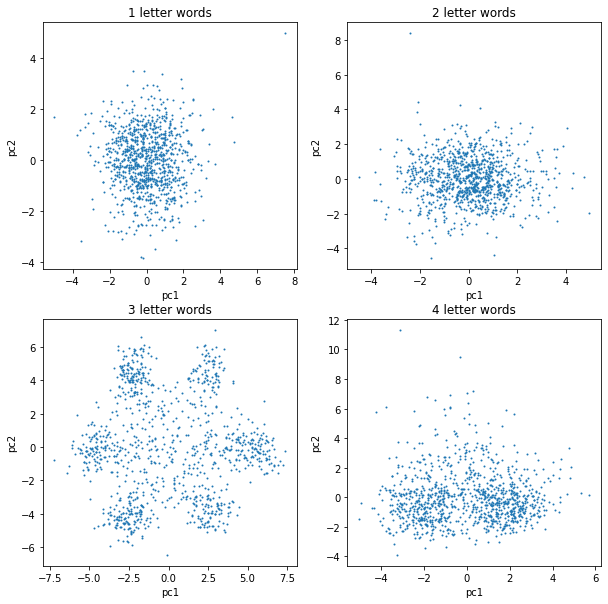

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(1,5):
    plt.subplot(2,2,i)
    x = pCompTables[i].loc[:,'pc1']
    y = pCompTables[i].loc[:,'pc2']
    plt.scatter(x,y, s=1)
    plt.xlabel('pc1')
    plt.ylabel("pc2")
    plt.title(str(i) + " letter words")

plt.show()

<p> From the plots we can clearly see that <b> 3 letters </b> generates identifiable visual relations between data points in the first <b> two principal components. These 3 letter words are called codns in biology </b>.</p>
<p><b> What do these point clouds (clusters) mean for the 3-letter words ? </b><br><br>
We can identify 6 distinct poles, or centroids in the graph. If the genetic information is coded in 3-letter words, each of these clusters has similar distributions or frequencies of these words. </p>
<p><b> Why 6 poles then ? </b><br><br>
Well, since we don't now when a word starts, we can think that if we read the data point with the shift of 1 letter, it would still contain basically the same information. Therefore, in the 3 letter words hypothesis, we can find 3 distinct poles, each representing a shift in reading. The remaining 3 poles are explained since, as the article points out, genetic information is composed of complementary strings. There are however actually 7 clusters, the last one being the points in the center of the figure, representing the bits of the code that do not carry information. </p>

<h2> t-SNE embending analysis </h2>

In [31]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)

pCompTablestSNE = {}

for i in range (1,5):
    tsne.fit(normFreqTables[i])
    
    pComponentstSNE = tsne.fit_transform(normFreqTables[i])
    
    #For each word size, we store the result of the PCA in a table containing only the first two principal component
    pCompTablestSNE[i] = pd.DataFrame(pComponentstSNE[:, [0,1]], columns=['emb1','emb2'])

print(pCompTablestSNE[2].head())

        emb1       emb2
0  21.347227  -0.467972
1  30.205132  16.402864
2  -6.695760  -8.003848
3 -10.596062   6.462112
4  -6.008407 -26.666019


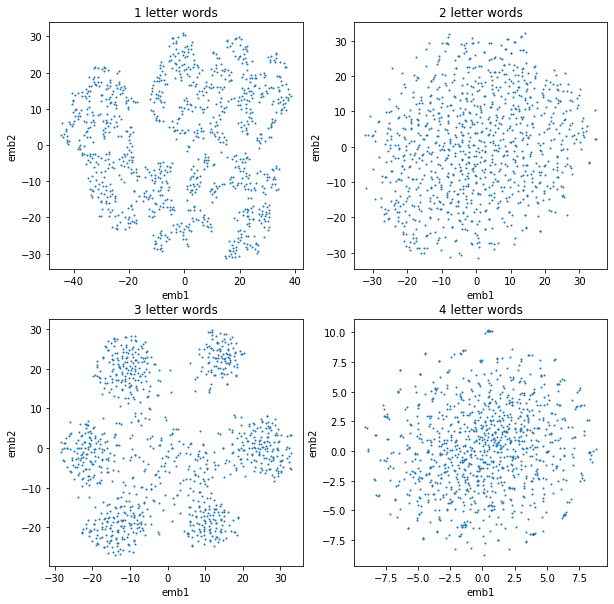

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(1,5):
    plt.subplot(2,2,i)
    x = pCompTablestSNE[i].loc[:,'emb1']
    y = pCompTablestSNE[i].loc[:,'emb2']
    plt.scatter(x,y, s=1)
    plt.xlabel('emb1')
    plt.ylabel("emb2")
    plt.title(str(i) + " letter words")

plt.show()

<h2> Clustering </h2>

<p> We will now cluster the 3 letter word gene breakdown using the K-means Clustering unsupervised algorithm. From the previous section, we can detect 6 or 7 clusters. Knowing that some genes do not carry information, we are led to think that the center points, far from the 6 distinct centroids, could be a candidate for those. We therefore assume that there are 7 clusters. </p>

In [21]:
kmeans = KMeans(n_clusters= 7)
kmeans.fit(normFreqTables[3])

KMeans(n_clusters=7)

<h2> Result in graph </h2>


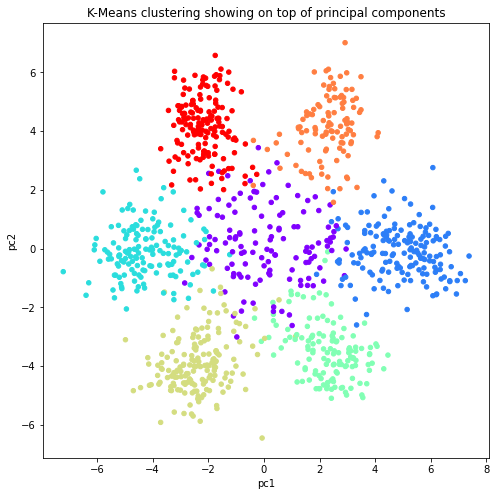

In [22]:
plt.figure(figsize=(8,8))

x = pCompTables[3].loc[:,'pc1']
y = pCompTables[3].loc[:,'pc2']
plt.scatter(x,y, s = 20, c = kmeans.labels_, cmap='rainbow')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title("K-Means clustering showing on top of principal components")

plt.show()

<p> Hence, Unsupervised Learning through Clustering(K-Means) and Dimensionality Reduction (PCA) has allowed us tovisualize, validate and provide supporting evidence for the biological discovery that the DNA genetic sequences is organized into three-letter words called codons, which are actually responsible for the amino acids and proteins that are produced by living cells </p>